In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

from smc_utils import drop_identifiers

### Data Prep

In [2]:
# import data
df = pd.read_excel(os.path.join("..","Data","SMC_DATA_wk0_mlr_imputed.xlsx"))
df = drop_identifiers(df)
df

,UniqueID,ParticipantID,ParticipantRecordCount,SEMESTER,SURVEY,Timestamp,STATE_behaviors,STATE_goals,COVID_residence,COVID_social_distancing,...,Hedge,Past_g,SAT,DIS,OU,OI,OP,PSI,PCC,Past_b
0,a9dbc45ece05459c91b7073f94165d9d,5710075738,5,Fall 2020,0,2020-09-20 17:17:09.790,"I generally use Reddit, Snapchat, Twitter, Ins...",I’d like to see myself distance a bit from soc...,In Boulder,4.0,...,0,0,1,1,0,1,0,1,0,0
1,ed0240e0259b415b92afcc633a9a017f,2563157200,5,Fall 2020,0,2020-09-20 19:11:21.316,Most used platforms:\n- instagram\n- snapchat\...,1. I would like to limit my use of snapchat an...,In Boulder,4.0,...,0,0,1,1,1,1,1,1,0,0
2,b28032790cb44cc2bc6923ab902392be,2122687351,5,Fall 2020,0,2020-09-19 13:44:59.325,"\n- I probably check each one 5 times a day, d...",- I would like to not always go on social med...,In Boulder,4.0,...,0,0,1,1,1,1,0,1,0,0
3,f6e5d609f65b4900aa35cee56e635c27,480385374,5,Fall 2020,0,2020-09-20 12:50:12.303,I use reddit and occasionally YouTube. I used ...,I think my behaviors are relatively healthy no...,At my family home,4.0,...,0,1,1,1,1,1,0,1,1,0
4,beb6ed14af234e0e93f96c7a4993fed0,5859634604,5,Fall 2020,0,2020-09-21 21:11:57.266,"I use youtube, amazon video, netflix all for c...",I am pretty happy with where I am right now. I...,At my family home,5.0,...,0,0,1,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,edff393cbb6f4a26837a850d75281ac0,4364018283,5,Spring 2023,0,2023-02-14 11:17:35.724,I use TikTok for about an hour a day; I connec...,I'd like to redirect myself when I use TikTok ...,NaN,NaN,...,0,0,1,1,0,1,0,1,0,0
502,cc8f4ce380444032bb58868d3cf97d30,3945155124,4,Spring 2023,0,2023-02-14 11:16:46.956,I use TikTok and Snapchat the most. Usually I ...,I would like to only spend 30 mins on instagra...,NaN,NaN,...,0,0,1,1,1,1,1,1,0,0
503,cfd9f31d4d304c88baef3d6b0516e7f8,3981192960,5,Spring 2023,0,2023-02-15 10:40:29.807,"I use Instagram, Snapchat, YouTube, and a few ...",I'd like to see a 20% decrease in screen time ...,NaN,NaN,...,0,0,1,1,0,1,1,0,0,0
504,622fb4a7f96d4a6a9e349bcd9337a093,712532050,5,Spring 2023,0,2023-02-14 11:21:39.389,- I use SnapChat and TikTok the most\n- I use ...,1. I would like to use TikTok less than two ho...,NaN,NaN,...,0,0,1,0,1,1,0,1,0,0


In [3]:
# further filter dataframe to include only those with BSMAS scores of 19 or higher
df = df[df['BSMAS_total'] >= 19]

In [4]:
behavior_cols = [
    'SAT',
    'DIS',
    'OU',
    'OI',
    'OP',
    'PSI',
    'PCC',
    'Past_b'
]

In [5]:
# columns for clustering
cluster_cols = [
    "BSMAS_total",
    "PSS_total",
    "ADTS_ANX_total",
    "ADTS_P_total",
    "ADTS_N_total",
    "SoPA_total",
    "SoNA_total",
    "ChQ_total",
    "SWLS_total"
]

In [6]:
corr_table = df[cluster_cols].corr().loc[:,['BSMAS_total']]
corr_table['BSMAS_total_abs'] = abs(corr_table['BSMAS_total'])
corr_table.sort_values(by='BSMAS_total_abs', ascending=False)[['BSMAS_total']]

,BSMAS_total
BSMAS_total,1.000000
SoNA_total,0.580143
PSS_total,0.338571
ADTS_ANX_total,0.272401
ChQ_total,0.216983
SWLS_total,-0.175358
ADTS_N_total,0.158504
SoPA_total,-0.052209
ADTS_P_total,-0.028980


### Clustering: K-means

In [7]:
from sklearn.cluster import KMeans

In [8]:
df_clust = df[['ParticipantID'] + cluster_cols + behavior_cols].copy()

In [9]:
#for c in cluster_cols:
#    df_clust[c] = (df_clust[c] - df_clust[c].mean()) / df_clust[c].std()

In [10]:
df_clust

,ParticipantID,BSMAS_total,PSS_total,ADTS_ANX_total,ADTS_P_total,ADTS_N_total,SoPA_total,SoNA_total,ChQ_total,SWLS_total,SAT,DIS,OU,OI,OP,PSI,PCC,Past_b
2,2122687351,19.0,23.000000,12.000000,5.000000,11.000000,21.579378,16.383559,18.064157,24.000000,1,1,1,1,0,1,0,0
7,6051276535,21.0,29.000000,9.000000,5.000000,9.000000,21.579378,17.031376,18.477765,24.000000,1,1,1,1,0,1,0,0
13,6111111181,20.0,37.000000,12.000000,7.000000,13.000000,21.579378,16.707467,18.270961,13.000000,1,1,1,1,0,1,0,0
22,1833869197,28.0,36.000000,15.000000,7.000000,15.000000,23.023348,19.298737,19.925394,26.000000,1,1,1,0,0,1,0,0
23,1975951409,20.0,28.000000,9.000000,7.000000,8.000000,22.567606,16.707467,18.270961,26.000000,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,3390038620,24.0,34.702716,11.888800,7.572707,10.634656,21.000000,23.000000,20.000000,22.390494,0,0,0,1,0,1,0,0
495,3099619359,26.0,31.531768,12.402677,7.572707,10.851214,21.000000,15.000000,17.000000,23.774220,1,1,1,1,0,1,0,0
496,1005524306,21.0,28.195202,11.117985,7.572707,10.309819,22.000000,15.000000,19.000000,23.774220,1,1,1,1,0,1,0,0
498,3173708073,30.0,38.706595,13.430430,7.572707,11.284330,26.000000,19.000000,25.000000,22.390494,0,0,0,0,0,0,0,1


In [11]:
df_clust.isna().sum()

ParticipantID     0
BSMAS_total       0
PSS_total         0
ADTS_ANX_total    0
ADTS_P_total      0
ADTS_N_total      0
SoPA_total        0
SoNA_total        0
ChQ_total         0
SWLS_total        0
SAT               0
DIS               0
OU                0
OI                0
OP                0
PSI               0
PCC               0
Past_b            0
dtype: int64

In [12]:
# iterate over different cluster numbers and plot mean distance of each point from its closest centroid

output_cluster_cols = []
output_cluster_and_behavior_cols = []

for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42).fit(df_clust[cluster_cols[1:]])
    mean_distance = kmeans.transform(df_clust[cluster_cols[1:]]).min(axis=1).mean()
    output_cluster_cols.append(mean_distance)
    
    kmeans = KMeans(n_clusters=n, random_state=42).fit(df_clust[cluster_cols[1:] + behavior_cols])
    mean_distance = kmeans.transform(df_clust[cluster_cols[1:] + behavior_cols]).min(axis=1).mean()
    output_cluster_and_behavior_cols.append(mean_distance)

([<matplotlib.axis.XTick at 0x7fae60c05a60>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

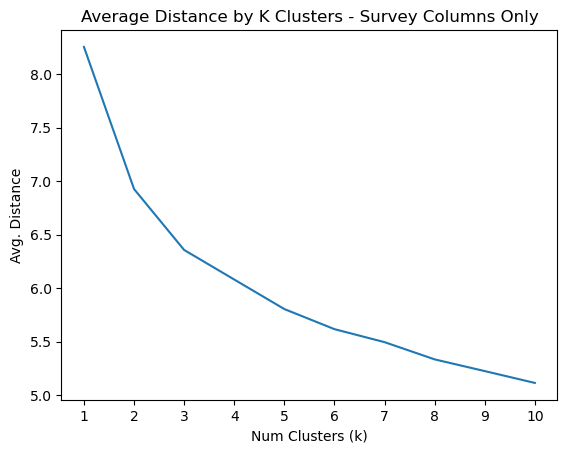

In [20]:
# all cols
sns.lineplot(data=output_cluster_cols)
plt.title('Average Distance by K Clusters - Survey Columns Only')
plt.ylabel('Avg. Distance')
plt.xlabel('Num Clusters (k)')
plt.xticks(range(0, 10), labels=[1,2,3,4,5,6,7,8,9,10])#, rotation='vertical')

([<matplotlib.axis.XTick at 0x7fae80229f10>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

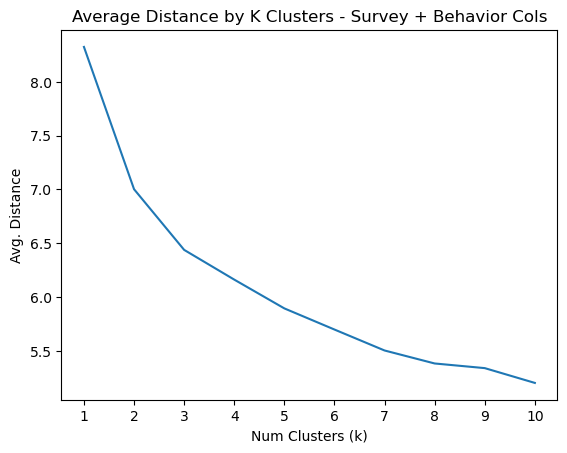

In [21]:
# all cols
sns.lineplot(data=output_cluster_and_behavior_cols)
plt.title('Average Distance by K Clusters - Survey + Behavior Cols')
plt.ylabel('Avg. Distance')
plt.xlabel('Num Clusters (k)')
plt.xticks(range(0, 10), labels=[1,2,3,4,5,6,7,8,9,10])#, rotation='vertical')

In [22]:
[round(c[1],2) for c in zip(output_cluster_cols, output_cluster_and_behavior_cols)]

[8.32, 7.0, 6.44, 6.16, 5.9, 5.7, 5.5, 5.38, 5.34, 5.2]

In [23]:
# 3 clusters looks to be good. We'll use cluster cols and behavior cols
keep_cols = cluster_cols + behavior_cols

In [24]:
n_clusters = 3
kmeans_min_preds = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(df_clust[keep_cols])

In [25]:
df['cluster'] = kmeans_min_preds

/var/folders/m8/3_46d0kx3550tv6p25r135jm0000gn/T/ipykernel_31459/2808393034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans_min_preds


In [26]:
#df.to_excel("cluster_3_min_feature.xlsx")

### Without Cluster Stat Analysis

In [27]:
res_med = []
res_mean = []
res_std = []

for i in range(n_clusters):
    count = len(df[df['cluster'] == i])
    clust_stats = df[df['cluster'] == i][keep_cols].describe()
    n_cols = len(clust_stats)
    
    # get median stats
    res_med_row = clust_stats.loc['50%',:]
    res_med_row.loc[n_cols] = int(i+1)
    res_med_row.loc[n_cols + 1] = count
    res_med.append(res_med_row)
    
    # get mean stats
    res_mean_row = clust_stats.loc['mean',:]
    res_mean_row.loc[n_cols] = int(i+1)
    res_mean_row.loc[n_cols + 1] = count
    res_mean.append(res_mean_row)
    
    # get std stats
    res_std_row = clust_stats.loc['std',:]
    res_std_row.loc[n_cols] = int(i+1)
    res_std_row.loc[n_cols + 1] = count
    res_std.append(res_std_row)
    
    

out = pd.DataFrame(res_med + res_mean + res_std)
out = out.reset_index()
out = out.rename(columns={8: 'cluster', 9: 'n_participants', 'index': 'stat'})
out['cluster'] = out['cluster'].astype(int)
out = out.set_index('cluster')
out = out[['stat', 'n_participants'] + [c for c in out.columns][1:-1]]
out.sort_index()

,stat,n_participants,BSMAS_total,PSS_total,ADTS_ANX_total,ADTS_P_total,ADTS_N_total,SoPA_total,SoNA_total,ChQ_total,SWLS_total,SAT,DIS,OU,OI,OP,PSI,PCC,Past_b
cluster,,,,,,,,,,,,,,,,,,,
1,50%,31.0,20.000000,22.000000,12.000000,8.000000,9.000000,21.579378,16.707467,18.270961,24.376130,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
1,mean,31.0,20.548387,20.709677,11.548387,7.612903,9.451613,22.068533,16.885095,18.767527,24.186155,0.741935,0.870968,0.806452,0.838710,0.032258,0.967742,0.000000,0.129032
1,std,31.0,1.312471,4.156870,2.487820,1.605769,2.706027,1.882600,0.425121,2.325726,4.200347,0.444803,0.340777,0.401610,0.373878,0.179605,0.179605,0.000000,0.340777
2,50%,49.0,24.000000,37.000000,12.000000,7.572707,11.000000,21.579378,18.003102,18.891373,20.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
2,mean,49.0,23.510204,37.625421,11.983406,7.457882,10.825145,21.733310,18.193897,19.037857,19.099176,0.612245,0.775510,0.857143,0.795918,0.102041,0.897959,0.102041,0.142857
2,std,49.0,3.116638,3.347433,2.479411,1.598794,2.594704,2.274908,1.749360,3.151133,3.540882,0.492287,0.421570,0.353553,0.407206,0.305839,0.305839,0.305839,0.353553
3,50%,92.0,21.000000,29.180173,11.787957,7.572707,10.418098,21.579378,17.031376,18.477765,23.053217,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
3,mean,92.0,21.565217,29.760829,11.231334,7.375985,10.273513,21.597322,17.138310,19.167288,23.159278,0.771739,0.902174,0.760870,0.782609,0.054348,0.869565,0.086957,0.163043
3,std,92.0,2.092920,2.457338,2.529573,1.467278,2.266644,1.663094,1.705711,2.749845,2.110642,0.422011,0.298707,0.428890,0.414731,0.227945,0.338627,0.283315,0.371429


In [28]:
out[out['stat'] == '50%']

,stat,n_participants,BSMAS_total,PSS_total,ADTS_ANX_total,ADTS_P_total,ADTS_N_total,SoPA_total,SoNA_total,ChQ_total,SWLS_total,SAT,DIS,OU,OI,OP,PSI,PCC,Past_b
cluster,,,,,,,,,,,,,,,,,,,
1,50%,31.0,20.0,22.000000,12.000000,8.000000,9.000000,21.579378,16.707467,18.270961,24.376130,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
2,50%,49.0,24.0,37.000000,12.000000,7.572707,11.000000,21.579378,18.003102,18.891373,20.000000,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
3,50%,92.0,21.0,29.180173,11.787957,7.572707,10.418098,21.579378,17.031376,18.477765,23.053217,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [29]:
out[out['stat'] == 'mean']

,stat,n_participants,BSMAS_total,PSS_total,ADTS_ANX_total,ADTS_P_total,ADTS_N_total,SoPA_total,SoNA_total,ChQ_total,SWLS_total,SAT,DIS,OU,OI,OP,PSI,PCC,Past_b
cluster,,,,,,,,,,,,,,,,,,,
1,mean,31.0,20.548387,20.709677,11.548387,7.612903,9.451613,22.068533,16.885095,18.767527,24.186155,0.741935,0.870968,0.806452,0.838710,0.032258,0.967742,0.000000,0.129032
2,mean,49.0,23.510204,37.625421,11.983406,7.457882,10.825145,21.733310,18.193897,19.037857,19.099176,0.612245,0.775510,0.857143,0.795918,0.102041,0.897959,0.102041,0.142857
3,mean,92.0,21.565217,29.760829,11.231334,7.375985,10.273513,21.597322,17.138310,19.167288,23.159278,0.771739,0.902174,0.760870,0.782609,0.054348,0.869565,0.086957,0.163043


In [30]:
out[out['stat'] == 'std']

,stat,n_participants,BSMAS_total,PSS_total,ADTS_ANX_total,ADTS_P_total,ADTS_N_total,SoPA_total,SoNA_total,ChQ_total,SWLS_total,SAT,DIS,OU,OI,OP,PSI,PCC,Past_b
cluster,,,,,,,,,,,,,,,,,,,
1,std,31.0,1.312471,4.156870,2.487820,1.605769,2.706027,1.882600,0.425121,2.325726,4.200347,0.444803,0.340777,0.401610,0.373878,0.179605,0.179605,0.000000,0.340777
2,std,49.0,3.116638,3.347433,2.479411,1.598794,2.594704,2.274908,1.749360,3.151133,3.540882,0.492287,0.421570,0.353553,0.407206,0.305839,0.305839,0.305839,0.353553
3,std,92.0,2.092920,2.457338,2.529573,1.467278,2.266644,1.663094,1.705711,2.749845,2.110642,0.422011,0.298707,0.428890,0.414731,0.227945,0.338627,0.283315,0.371429


In [31]:
df

,UniqueID,ParticipantID,ParticipantRecordCount,SEMESTER,SURVEY,Timestamp,STATE_behaviors,STATE_goals,COVID_residence,COVID_social_distancing,...,Past_g,SAT,DIS,OU,OI,OP,PSI,PCC,Past_b,cluster
2,b28032790cb44cc2bc6923ab902392be,2122687351,5,Fall 2020,0,2020-09-19 13:44:59.325,"\n- I probably check each one 5 times a day, d...",- I would like to not always go on social med...,In Boulder,4.0,...,0,1,1,1,1,0,1,0,0,0
7,cd34ec8f67c84d668773f03281e9a17d,6051276535,5,Fall 2020,0,2020-09-20 14:36:12.088,On my phone I spend an average of 4- 5 hours o...,I want to change the interaction I have with m...,In Boulder,4.0,...,0,1,1,1,1,0,1,0,0,2
13,75917203670d4dd8bb4ec1d3d491b22c,6111111181,5,Fall 2020,0,2020-09-20 14:24:50.812,"I am not big on social media, but I do use Ins...",I have thought a lot about noticed how Instagr...,In Boulder,4.0,...,0,1,1,1,1,0,1,0,0,1
22,e096165ef59d4b218d982cf007d2f543,1833869197,5,Fall 2020,0,2020-09-16 21:45:53.817,"Recently, I have been noticing that I am even ...",I personally am considering trying to delete i...,Both at home and in Boulder,2.0,...,0,1,1,1,0,0,1,0,0,1
23,a2726a7b9d914f55a4ec9c427d8dfd8c,1975951409,5,Fall 2020,0,2020-09-20 20:12:00.374,"Question 1\nI use Instagram, Twitter, Snapchat...",Question 2\nI would like to spend at most 2 ho...,I was at my family home until classes began,4.0,...,0,1,1,1,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,e783dfc982024e09b47fdb9a0a3a85d7,3390038620,3,Spring 2023,0,2023-02-14 11:23:27.217,I currently have instagram twitter snapchat fa...,I would like to turn off notifications \nI wou...,NaN,NaN,...,0,0,0,0,1,0,1,0,0,1
495,cd9011039ae54ed2b0596ec17700a85a,3099619359,1,Spring 2023,0,2023-02-14 11:23:20.848,"- i use tiktok, instagram, snapchat, pinterest...",I will not scroll through tiktok before I go t...,NaN,NaN,...,0,1,1,1,1,0,1,0,0,2
496,2b537e89a54448eea35c6fad105d3d3b,1005524306,4,Spring 2023,0,2023-02-14 11:23:43.504,"- I use TikTok, Instagram, Snapchat, and BeRea...",- I will use TikTok for 15 minutes less so tha...,NaN,NaN,...,0,1,1,1,1,0,1,0,0,2
498,20d71084ebce494baeacfe4c83e7ac87,3173708073,3,Spring 2023,0,2023-02-14 11:20:18.015,I use snapchat a lot. But I would like to use ...,I would like to use my phone for at most 1:30 ...,NaN,NaN,...,0,0,0,0,0,0,0,0,1,1


### Within Cluster Analysis

In [32]:
df_full = pd.read_excel(os.path.join("..","Data","SMC_DATA_clean.xlsx"))

In [33]:
# join behaviors and goals
df_goals = pd.read_csv(os.path.join("..","Data","Annotations","goals_final_participant_level.csv"))
df_goals = df_goals.rename(columns={'Past':'Past_g'})
df_behav = pd.read_csv(os.path.join("..","Data","Annotations","behaviors_final_participant_level.csv"))
df_behav = df_behav.rename(columns={'Past':'Past_b'})

In [34]:
df_full = df_full.merge(df_goals, on='ParticipantID')
df_full = df_full.merge(df_behav, on='ParticipantID')

df_full = drop_identifiers(df_full)
        
df_full.head()

,UniqueID,ParticipantID,ParticipantRecordCount,SEMESTER,SURVEY,Timestamp,STATE_behaviors,STATE_goals,COVID_residence,COVID_social_distancing,...,Hedge,Past_g,SAT,DIS,OU,OI,OP,PSI,PCC,Past_b
0,a9dbc45ece05459c91b7073f94165d9d,5710075738,5,Fall 2020,0,2020-09-20 17:17:09.790,"I generally use Reddit, Snapchat, Twitter, Ins...",I’d like to see myself distance a bit from soc...,In Boulder,4.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,e25bccd85f6e4450b4d7482ed2368fa0,5710075738,5,Fall 2020,1,2020-09-26 21:36:08.963,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,e58dce6b780b4e2b89f850f4b8a91352,5710075738,5,Fall 2020,2,2020-10-04 21:12:24.774,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,34c77a8cc9db4cf4b3e05cfbe3314443,5710075738,5,Fall 2020,3,2020-10-12 10:23:31.748,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1f92e68056a94c0584ac911c9b264766,5710075738,5,Fall 2020,4,2020-10-25 23:49:54.287,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [35]:
res = {}

for i in range(n_clusters):
    cluster_pids = df[df['cluster'] == i]['ParticipantID']
    df_full_c = df_full[df_full['ParticipantID'].isin(cluster_pids)].sort_values('SURVEY')
    bsmas_diff = df_full_c.groupby('ParticipantID')['BSMAS_total'].agg(['first','last'])
    bsmas_diff['diff'] = bsmas_diff['first'] - bsmas_diff['last']
    q25, q75 = bsmas_diff['diff'].quantile([.25, .75])
    q25_pids = bsmas_diff[bsmas_diff['diff'] <= q25].index
    q75_pids = bsmas_diff[bsmas_diff['diff'] >= q75].index
    res['cluster_{}'.format(i+1)] = {'q25': q25, 'q75': q75, 'q25_pids': q25_pids, 'q75_pids': q75_pids}

In [36]:
res

{'cluster_1': {'q25': 2.0,
  'q75': 8.5,
  'q25_pids': Int64Index([ 112944987,  595415796, 1098791585, 1686645419, 2435364199,
              2923583535, 5959491780, 6026806165, 6123728333],
             dtype='int64', name='ParticipantID'),
  'q75_pids': Int64Index([ 470563218,  779059191,  907983596, 2097512530, 2186398284,
              3765325085, 3817682531, 5592880975],
             dtype='int64', name='ParticipantID')},
 'cluster_2': {'q25': 4.0,
  'q75': 11.0,
  'q25_pids': Int64Index([ 522126842, 1222318538, 1347494696, 1491325576, 1891557159,
              2178902209, 3234517413, 3390038620, 4217108081, 4557067279,
              5078923845, 5267183410, 5902953821, 6111111181, 6139383585,
              6304911158],
             dtype='int64', name='ParticipantID'),
  'q75_pids': Int64Index([  60932967,  524830796,  796632156, 1499252140, 1833869197,
              2020829926, 2230197041, 2880046363, 3173708073, 3205658638,
              3644570984, 3901779362, 4981271732],
     

# Save clusters to excel sheet

In [30]:
pd.set_option('display.max_columns', None)

In [37]:
writer = pd.ExcelWriter(os.path.join("..", "Data", "bsmas_cluster_sheets_deidentified.xlsx"), engine='xlsxwriter')

for cluster in res.keys():
    df_cluster_25 = df_full[df_full['ParticipantID'].isin(res[cluster]['q25_pids'])].copy()
    df_cluster_25['success'] = 'low'
    
    df_cluster_75 = df_full[df_full['ParticipantID'].isin(res[cluster]['q75_pids'])].copy()
    df_cluster_75['success'] = 'high'
    
    df_cluster = pd.concat([df_cluster_25, df_cluster_75])
    
    df_cluster.to_excel(writer, sheet_name=cluster)

writer.save()

# Examine cluster trends for initial survey

In [38]:
clust1 = pd.read_excel(os.path.join("..","Data","bsmas_cluster_sheets_deidentified.xlsx"), sheet_name="cluster_1")
clust1['cluster'] = 1
clust2 = pd.read_excel(os.path.join("..","Data","bsmas_cluster_sheets_deidentified.xlsx"), sheet_name="cluster_2")
clust2['cluster'] = 2
clust3 = pd.read_excel(os.path.join("..","Data","bsmas_cluster_sheets_deidentified.xlsx"), sheet_name="cluster_3")
clust3['cluster'] = 3

clust_all_wks = pd.concat([clust1, clust2, clust3])

In [39]:
clust1 = pd.read_excel(os.path.join("..","Data","bsmas_cluster_sheets_deidentified.xlsx"), sheet_name="cluster_1")
clust1 = clust1[clust1['SURVEY'] == 0]
clust2 = pd.read_excel(os.path.join("..","Data","bsmas_cluster_sheets_deidentified.xlsx"), sheet_name="cluster_2")
clust2 = clust2[clust2['SURVEY'] == 0]
clust3 = pd.read_excel(os.path.join("..","Data","bsmas_cluster_sheets_deidentified.xlsx"), sheet_name="cluster_3")
clust3 = clust3[clust3['SURVEY'] == 0]

In [40]:
behav_cols = [c for c in df_behav if not c.startswith("Unnamed")]
goals_cols = [c for c in df_goals if not c.startswith("Unnamed")]
survey_cols = [c for c in df_full if c.endswith('_total')]


interest_cols = [c for c in behav_cols + goals_cols + survey_cols if not c == 'ParticipantID']

### All Clusters

In [41]:
clust_all = pd.concat([clust1, clust2, clust3])
clust_all[interest_cols] = clust_all[interest_cols].fillna(clust_all[interest_cols].mean())

In [42]:
clust_all.groupby('success').mean()[behav_cols]

,ParticipantID,SAT,DIS,OU,OI,OP,PSI,PCC,Past_b
success,,,,,,,,,
high,2.853394e+09,0.772727,0.909091,0.909091,0.840909,0.068182,0.931818,0.045455,0.136364
low,3.283893e+09,0.700000,0.920000,0.780000,0.920000,0.040000,0.900000,0.100000,0.080000


In [43]:
clust_all.groupby('success').mean()[goals_cols]

,ParticipantID,OI Change,OP Change,PSI Change,PCC Change,RWBC,DBC,S_DBC,Mindful,Hedge,Past_g
success,,,,,,,,,,,
high,2.853394e+09,0.886364,0.113636,0.681818,0.045455,0.386364,0.954545,0.886364,0.113636,0.136364,0.045455
low,3.283893e+09,0.900000,0.120000,0.740000,0.080000,0.180000,0.900000,0.840000,0.080000,0.100000,0.080000


In [44]:
clust_all.groupby('success').mean()[survey_cols]

,BSMAS_total,PSS_total,ADTS_ANX_total,ADTS_P_total,ADTS_N_total,RSES_total,SWLS_total,PSOC_total,LONE_total,SoPA_total,SoNA_total,ChQ_total
success,,,,,,,,,,,,
high,23.204545,29.559492,11.646769,7.094195,10.213308,5.931818,20.899476,67.723776,4.851399,21.81405,18.400826,18.035124
low,21.220000,31.217059,12.106988,7.347470,10.333253,6.880000,20.437692,65.784615,4.986154,21.48000,18.160000,18.140000


We see from analyzing all clusters that:
- RWBC really sets apart those who successfully change their social media addiction scores. 
- DBC is helpful, but not enough on its own

### Cluster 1

In [45]:
clust1.groupby('success').mean()[behav_cols]

,ParticipantID,SAT,DIS,OU,OI,OP,PSI,PCC,Past_b
success,,,,,,,,,
high,2.452176e+09,0.750000,1.0,0.875000,1.0,0.000000,1.0,0.0,0.125000
low,2.995864e+09,0.777778,1.0,0.777778,1.0,0.111111,1.0,0.0,0.111111


In [46]:
clust1.groupby('success').mean()[goals_cols]

,ParticipantID,OI Change,OP Change,PSI Change,PCC Change,RWBC,DBC,S_DBC,Mindful,Hedge,Past_g
success,,,,,,,,,,,
high,2.452176e+09,1.0,0.125000,0.750000,0.000000,0.500000,0.875000,0.875000,0.0,0.125000,0.0
low,2.995864e+09,1.0,0.444444,0.888889,0.111111,0.111111,0.888889,0.777778,0.0,0.111111,0.0


In [47]:
clust1.groupby('success').mean()[survey_cols]

,BSMAS_total,PSS_total,ADTS_ANX_total,ADTS_P_total,ADTS_N_total,RSES_total,SWLS_total,PSOC_total,LONE_total,SoPA_total,SoNA_total,ChQ_total
success,,,,,,,,,,,,
high,21.625000,20.500000,12.000000,6.750000,8.875,8.875000,22.666667,67.666667,6.00,NaN,NaN,NaN
low,20.333333,22.777778,12.555556,8.111111,10.000,11.777778,22.000000,69.250000,5.25,NaN,NaN,NaN


Those in cluster 1 show the following patterns:
- They rely on RWBC more than the average participant for success
- If they consider modifying their device behavior, they should be specific about it
- They should avoid focusing too much on OP behavior, as that seems to correspond to worse outcomes

### Cluster 2

In [48]:
clust2.groupby('success').mean()[behav_cols]

,ParticipantID,SAT,DIS,OU,OI,OP,PSI,PCC,Past_b
success,,,,,,,,,
high,2.365660e+09,0.769231,0.769231,0.923077,0.769231,0.230769,0.923077,0.0000,0.384615
low,3.678558e+09,0.500000,0.875000,0.875000,0.937500,0.000000,0.937500,0.3125,0.000000


In [49]:
clust2.groupby('success').mean()[goals_cols]

,ParticipantID,OI Change,OP Change,PSI Change,PCC Change,RWBC,DBC,S_DBC,Mindful,Hedge,Past_g
success,,,,,,,,,,,
high,2.365660e+09,0.769231,0.230769,0.615385,0.076923,0.461538,1.0000,1.0000,0.230769,0.076923,0.076923
low,3.678558e+09,0.875000,0.000000,0.750000,0.062500,0.187500,0.9375,0.8125,0.125000,0.187500,0.187500


In [50]:
clust2.groupby('success').mean()[survey_cols]

,BSMAS_total,PSS_total,ADTS_ANX_total,ADTS_P_total,ADTS_N_total,RSES_total,SWLS_total,PSOC_total,LONE_total,SoPA_total,SoNA_total,ChQ_total
success,,,,,,,,,,,,
high,25.538462,36.900000,12.363636,7.727273,10.818182,7.384615,19.75,65.250,4.00,24.0,21.5,16.5
low,22.687500,37.533333,12.466667,6.666667,10.866667,10.562500,17.25,58.375,5.75,21.0,23.0,20.0


Those in cluster 2 show the following patterns:
- OP change corresponds to a higher likelihood of success for these people
- They seems to benefit more from mindfulness based intentions
- They should be specific about their intentions -- hedging corresponds to lower success
- Those who have low success tend to focus on their past changes

### Cluster 3

In [51]:
clust3.groupby('success').mean()[behav_cols]

,ParticipantID,SAT,DIS,OU,OI,OP,PSI,PCC,Past_b
success,,,,,,,,,
high,3.268624e+09,0.782609,0.956522,0.913043,0.826087,0.00,0.913043,0.086957,0.00
low,3.134998e+09,0.800000,0.920000,0.720000,0.880000,0.04,0.840000,0.000000,0.12


In [52]:
clust3.groupby('success').mean()[goals_cols]

,ParticipantID,OI Change,OP Change,PSI Change,PCC Change,RWBC,DBC,S_DBC,Mindful,Hedge,Past_g
success,,,,,,,,,,,
high,3.268624e+09,0.913043,0.043478,0.695652,0.043478,0.304348,0.956522,0.826087,0.086957,0.173913,0.043478
low,3.134998e+09,0.880000,0.080000,0.680000,0.080000,0.200000,0.880000,0.880000,0.080000,0.040000,0.040000


In [53]:
clust3.groupby('success').mean()[survey_cols]

,BSMAS_total,PSS_total,ADTS_ANX_total,ADTS_P_total,ADTS_N_total,RSES_total,SWLS_total,PSOC_total,LONE_total,SoPA_total,SoNA_total,ChQ_total
success,,,,,,,,,,,,
high,22.434783,28.272727,11.05,6.85,10.4,4.086957,22.750000,78.750000,4.250000,22.666667,18.0,18.333333
low,20.600000,30.533333,11.70,7.55,10.1,2.760000,24.333333,70.333333,3.333333,20.200000,16.2,18.200000


Those in cluster 3 showed the following patterns:
- RWBC is still helpful, but not as important as for others
- Hedging corresponds to higher success in this group, meaning that looser language may help goal adherence
- DBC is also more important for this group than others

# Check for participants in each cluster

1. People who struggle with task-switching, self-regulation?


2. Are these the introverted gamer types?


3. People who are really hard on themselves?

In [54]:
clust_all_wks.groupby(['cluster','success'])['WEEKLY_self_assessment_score'].mean()

cluster  success
1        high       3.483871
         low        3.058824
2        high       3.720000
         low        2.929825
3        high       3.506173
         low        2.820513
Name: WEEKLY_self_assessment_score, dtype: float64

In [55]:
len(clust_all)

94

In [56]:
len(df_full[(df_full['BSMAS_total'] >= 19)])# & (df_full['SURVEY'] == 0)])

592

### Next steps:

Choose 10-20 people from each cluster and observe patterns

Start making methods for this process